<h2> Statevector </h2>

Qiskit's Statevector class provides functionality for defining and manipulating quantum state vectors. <br>
A state vector in quantum mechanics represents the <b>quantum state </b>of a system. For the state vector to be valid, it must satisfy specific conditions that ensure it adheres to the fundamental principles of quantum theory. These conditions are primarily based on the concepts of normalization and unitarity. <br>
1. <h5>Normalization Condition:</h5> 
The state vector must be normalized, meaning its total probability must sum to 1. This reflects the fact that the system must be in some state with 100% certainty. <br>
Mathematically, if ∣𝜓⟩ is a state vector, it must satisfy the following condition: ⟨ψ∣ψ⟩=1
That is he inner product (or dot product) of the state vector, which results to the total probability of all possible outcomes.
<br>
For a single qubit, the state ∣𝜓⟩=𝛼∣0⟩+𝛽∣1⟩ must satisfy the normalization condition: 𝛼^2 + 𝛽^2=1

2. <h5>State Vector Must Live in a Hilbert Space</h5>
   A valid state vector must belong to a Hilbert space, which is a vector space with certain properties, including: <br>
   (a)Completeness (i.e., it contains all possible states that the system can be in).
   (b)Ability to perform inner products, which are essential for calculating probabilities.
   For a system of n qubits, the state lives in a 2^n  dimensional Hilbert space.
3. <h5>Superposition of Basis States<h/5>
   A valid state vector can be expressed as a superposition of basis states. Any valid state must be a linear combination of these basis 
   states with complex coefficients
4. <h5>Unitarity of Quantum Evolution</h5>
    While the above three points describe a valid state at a specific moment, any change to a quantum state (such as due to time evolution 
    or a quantum gate) must be unitary. Unitary transformations preserve the normalization of the state vector over time.<br>
    A unitary matrix U satisfies the condition: U'U = UU' = I , where U' is the conjugate transpose of U. I is the identity matrix. 

Summary of Conditions for a Valid State Vector:<br>
<b>Normalization:</b> The state vector must have a total probability of 1 (i.e., ⟨𝜓∣𝜓⟩=1). <br>
<b>Hilbert Space: </b>The state must belong to the appropriate Hilbert space for the system.<br>
<b>Superposition: </b>The state can be a superposition of valid basis states.<br>
<b>Unitary Evolution:</b> Any evolution or transformation of the state must be unitary to preserve normalization.

<h5>If any of these conditions are violated, the state vector will not be valid, meaning it would not correspond to a physically realizable quantum state.</h5>
 

In [2]:
from qiskit.quantum_info import Statevector
from numpy import sqrt

u = Statevector([1 / sqrt(2), 1 / sqrt(2)])
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
w = Statevector([1 / 3, 2 / 3])

print("State vectors u, v, and w have been defined.")

State vectors u, v, and w have been defined.


In [3]:
#Let us display the State vectors defined using display() with draw() method of Statevector class
display(u.draw("latex"))

<IPython.core.display.Latex object>

The quantum state defined above has probability amplitudes  of half of root 2  for both states:  ∣0⟩ and ∣1⟩

In [4]:
# To compute the vectors in values
display(v.draw("text"))

[ 0.33333333+0.66666667j,-0.66666667+0.j        ]

The <b>Statevector </b>class also includes the <b>is_valid</b> method, which checks to see if a given vector is a valid quantum state vector (i.e., that it has Euclidean norm equal to 1):

In [5]:
display(u.is_valid()) 

True

As you can see  <b>u = Statevector([1 / sqrt(2), 1 / sqrt(2)]) </b> defined above is a valid state vector

But let us check for <b> w = Statevector([1 / 3, 2 / 3]) </b>

In [6]:
display(w.is_valid())

False

It is not a valid state vector. (1/3)^2 + (2/3)^2 is not equal to 1

In [9]:

v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")

<IPython.core.display.Latex object>

<h4>MEASEUREMENT OF QUANTUM SYSTEM</h4>
To measure a Quantum system, there is need to learn <b>Heisenberg’s Uncertainty Principle</b>  which states that there are certain pairs of physical properties (called complementary variables) of a particle that cannot be precisely measured or known simultaneously. The more accurately one property is known, the less accurately the other can be known.  

By this principle ,it means a quantum at superposition, all the states of a quantum system exist,but the superposition collapse after measurement

Measurements of quantum states can be simulated in Qiskit, using the measure method from the Statevector class.

In [13]:
v = Statevector([(1 + 2.0j) / 3, -2 / 3])
v.draw("latex")



<IPython.core.display.Latex object>

In [14]:
v.measure()

('0',
 Statevector([0.4472136+0.89442719j, 0.       +0.j        ],
             dims=(2,)))

Statevector also comes with a sample_counts method that allows for the simulation of any number of measurements on the system.

{'0': 547, '1': 453}

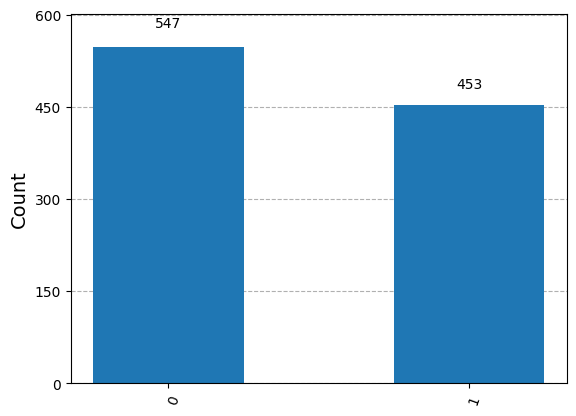

In [16]:
from qiskit.visualization import plot_histogram

statistics = v.sample_counts(1000)
display(statistics)
plot_histogram(statistics)  # Example of what statistics could look like: {'000': 520, '111': 480}
# In this example, the quantum system was measured in the state ∣000⟩ 520 times and in the state ∣111⟩ 480 times.